# Latar Belakang

Pada era teknologi yang semakin maju, perusahaan Online Retail Shipping bernama "ExpressMart" telah menjadi salah satu pemain terkemuka dalam industri pengiriman online.

Namun, perusahaan ini masih menghadapi tantangan dalam mengirimkan produk dengan tepat waktu. *Stakeholder* ExpressMart menyadari bahwa ada beberapa faktor yang mungkin berkontribusi terhadap ketidaktepatan pengiriman produk. Selanjutnya, ExpressMart juga menghadapi kendala logistik internal. Proses pengolahan dan pemrosesan pesanan yang kompleks memerlukan koordinasi yang baik antara tim yang terlibat, mulai dari pergudangan, pengemasan, hingga pengiriman akhir. Keterbatasan komunikasi dan sinergi yang kurang optimal antara tim dapat menyebabkan kebingungan atau kesalahan dalam penanganan pesanan, yang berpotensi memperlambat pengiriman produk.

Dengan semangat inovasi yang kuat, ExpressMart bertekad untuk terus meningkatkan layanan pengiriman lebih baik. ExpressMart percaya bahwa dengan mengatasi hambatan-hambatan ini dan sembari meningkatkan efisiensi operasional kinerja perusahaan, ExpressMart akan dapat memberikan pengiriman yang lebih cepat, akurat, dan andal kepada seluruh pelanggan di seluruh dunia.

# Pernyataan Masalah
Perusahaan ingin mengetahui **apa saja yang dapat menyebabkan keterlambatan pengiriman produk**.

Informasi ini akan membantu perusahaan untuk meningkatkan kualitas ketepatan waktu pengiriman. 

- Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana cara untuk meningkatkan ketepatan waktu pengiriman?**

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data Online Retail Shipping yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1qDcYH_h5-7v6Z9h6MlWiEC8wtY7TFp9Z).

In [842]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait data pada Online Retail Shipping. Ada 12 kolom di dalam dataset Online Retail Shipping, yaitu:  

* ID : ID untuk tiap customer.
* Warehouse_block : Perusahaan mempunyai gudang besar yang terbagi dalam beberapa blok (A-E)
* Mode_of_Shipment : Perusahaan mengirimkan produk dalam beberapa cara (Kapal, Penerbangan, dan Darat)
* Customer_care_calls : Jumlah panggilan yang terbuat dari pertanyaan mengenai Pengiriman.
* Customer_rating : Rating dari customer. 1 adalah yang terendah, 5 adalah yang tertinggi.
* Cost_of_the_Product :  Biaya produk dalam Dolar AS.
* Prior_purchases : Jumlah pembelian sebelumnya.
* Product_importance : Perusahaan mengkategorikan produk dalam beberapa parameter (low, medium, high).
* Gender : Laki-laki dan Perempuan.
* Discount_offered : Diskon yang ditawarkan pada produk tertentu.
* Weight_in_gms : Berat dalam satuan gram.
* Reached.on.Time_Y.N : 0 – produk sampai tepat waktu, 1 – produk tidak sampai tepat waktu.


Berikut 5 baris teratas dan terbawah dari dataset Online Retail Shipping.

In [843]:
df = pd.read_csv('Online Retail Shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data Understanding & Data Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Online Retail Shipping.

### Cek Info pada Data

In [844]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [845]:
display(df.describe().transpose(), df.describe(include='object').transpose())

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


In [846]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


Secara umum, kita bisa melihat bahwa:
* dataset Online Retail Shipping memiliki 12 kolom dan 10.999 baris.
* kolom `ID` berisikan id unik untuk tiap customer, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

### Data Kategorikal

- Warehouse_block -> Ada 5 blok gudang yang digunakan oleh perusahaan.
- Mode_of_Shipment -> Ada 3 metode pengiriman yang dilakukan oleh perusahaan.
- Product_importance -> Ada 3 kategori pada tingkat kepentingan produk yang ditentukan oleh perusahaan.
- Gender -> Ada 2 jenis kelamin pada data pelanggan (Laki-laki dan Perempuan).
- Reached.on.Time_Y.N -> Ada 2 indikator, yakni 0 untuk pengiriman tepat waktu (sebesar 40,33%), dan 1 untuk pengiriman tidak tepat waktu (sebesar 59,67%).

### Statistika Deskriptif

1. **Weight_in_gms** : 
- Mean (Rata-rata) = 3634.01 gram
- Min (Nilai Minimum) = 1001 gram
- Q1 = 1839.5 gram
- Q2 / Median = 4149 gram
- Q3 = 5050 gram
- Max (Nilai Maksimum) = 7846 gram

2. **Discount_offered** : 
- Mean (Rata-rata) = 13.37%
- Min (Nilai Minimum) = 1%
- Q1 = 4%
- Q2 / Median = 7%
- Q3 = 10%
- Max (Nilai Maksimum) = 65%

3. **Prior_purchases** :
- Mean (Rata-rata) = 3.56
- Min (Nilai Minimum) = 2
- Q1 = 3
- Q2 / Median = 3
- Q3 = 4
- Max (Nilai Maksimum) = 10

4. **Cost_of_the_Product** :
- Mean (Rata-rata) = 210.19
- Min (Nilai Minimum) = 96
- Q1 = 169
- Q2 / Median = 214
- Q3 = 251
- Max (Nilai Maksimum) = 310

5. **Customer_rating** : 
- Mean (Rata-rata) = 2.99
- Min (Nilai Minimum) = 1
- Q1 = 2
- Q2 / Median = 3
- Q3 = 4
- Max (Nilai Maksimum) = 5

6. **Customer_care_calls** : 
- Mean (Rata-rata) = 4.05
- Min (Nilai Minimum) = 2
- Q1 = 3
- Q2 / Median = 4
- Q3 = 5
- Max (Nilai Maksimum) = 7

### Cek Duplikasi pada Data

In [847]:
df.duplicated().sum()

0

Setelah dilakukan langkah pengecekan duplikasi pada data, tidak ditemukan adanya data yang terduplikasi.
Proses analisis data dapat menghasilkan informasi yang lebih akurat dikarenakan tidak ada data duplikat yang beresiko dapat menimbulkan hasil analisis yang tidak akurat.

### Cek Missing Value pada Data

In [848]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Setelah dilakukan langkah pengecekan nilai yang hilang *(missing value)* pada data, tidak ditemukan adanya data yang hilang.
Proses analisis data dapat menghasilkan informasi yang lebih akurat dikarenakan tidak ada data hilang yang beresiko dapat menimbulkan hasil analisis yang tidak akurat.

### Persentase Missing Value di tiap Kolom

In [849]:
df.isna().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

# Data Formatting

Data formatting dilakukan agar data dapat lebih mudah dipahami dan diolah dengan lebih baik.

- Perubahan tipe data *integer* ke *object*

In [850]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.0+ MB


### Mengganti Nama Kolom & Melakukan Mapping

Proses Formatting yang dilakukan : 
- Perubahan nama kolom 'Reached.on.Time_Y.N' menjadi 'Reached_on_Time', agar dapat lebih mudah dipahami.
- Mapping data pada kolom 'Reached_on_Time' yang sebelumnya berisi angka 1 yang berarti pengiriman tidak tepat waktu menjadi Not On Time,
dan angka 0 yang berarti pengiriman tepat waktu menjadi On Time

In [852]:
df = df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time'})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Melakukan Mapping

In [853]:
mapping = {'1':'Not On Time', '0':'On Time'}
df = df.replace({'Reached_on_Time':mapping})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,Not On Time
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,On Time
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,On Time
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,On Time


### Check Mapping

In [854]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time


### Statistika Deskriptif pada Data yang sudah dilakukan Formatting

In [855]:
display(df.describe().transpose(), df.describe(include = "object").transpose())

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545
Reached_on_Time,10999,2,Not On Time,6563


# Data Analysis

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan proses analisis untuk mencari tahu **apa saja yang dapat menyebabkan keterlambatan pengiriman produk**, kemudian **menemukan pola/indikasi dalam data** dengan harapan dapat **meningkatkan ketepatan waktu pengiriman produk**.

### Cek Outlier

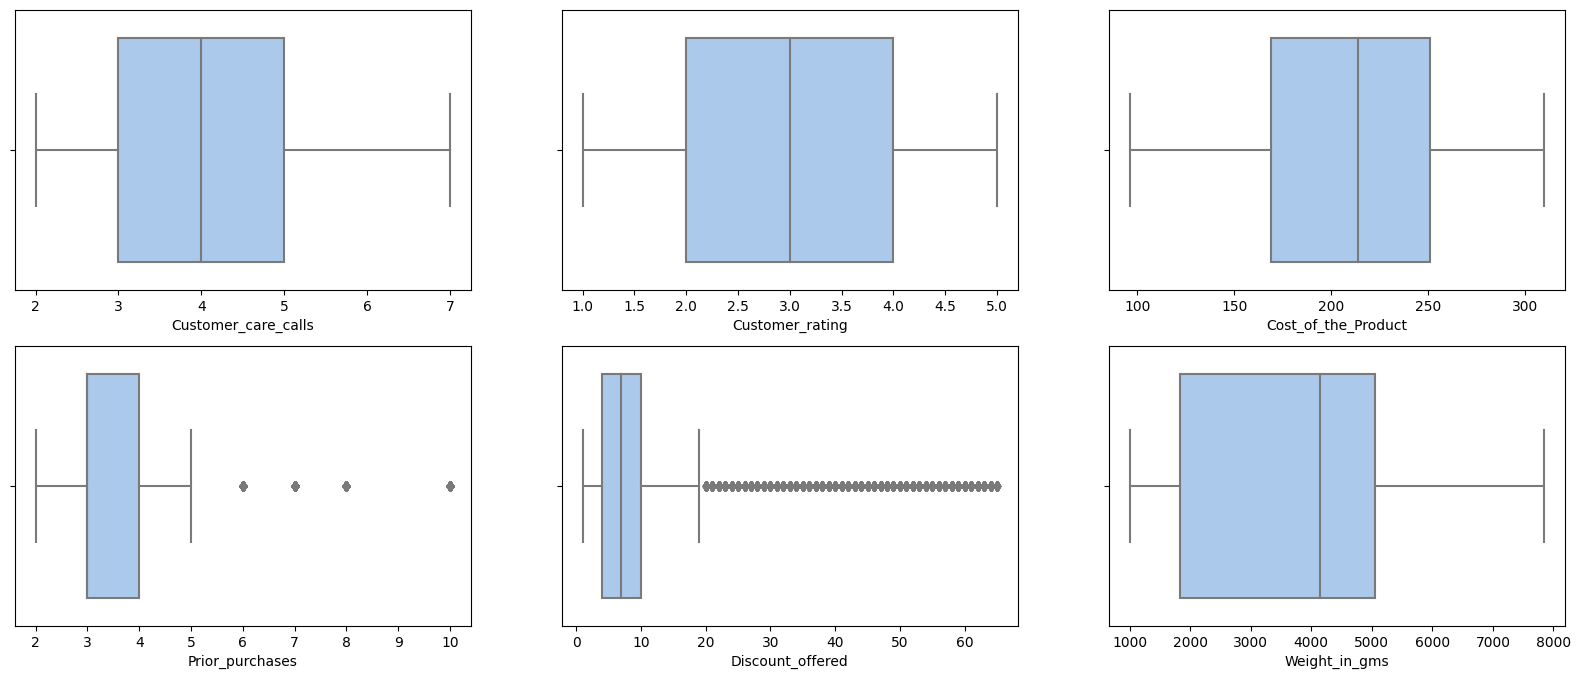

In [856]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

color_palette = sns.color_palette('pastel')

sns.boxplot(
    data=df,
    x='Customer_care_calls',
    ax=axes[0][0],
    palette=color_palette
)

sns.boxplot(
    data=df,
    x='Customer_rating',
    ax=axes[0][1],
    palette=color_palette
)

sns.boxplot(
    data=df,
    x='Cost_of_the_Product',
    ax=axes[0][2],
    palette=color_palette
)

sns.boxplot(
    data=df,
    x='Prior_purchases',
    ax=axes[1][0],
    palette=color_palette
)

sns.boxplot(
    data=df,
    x='Discount_offered',
    ax=axes[1][1],
    palette=color_palette
)

sns.boxplot(
    data=df,
    x='Weight_in_gms',
    ax=axes[1][2],
    palette=color_palette
)

plt.show()


- Pada Kolom Customer_care_calls, Customer_rating, Cost_of_the_Product, dan Weight_in_gms tidak ditemukan adanya Outlier.
- Outlier pada Kolom Discount_offered tidak perlu dihapus, dikarenakan besaran Discount yang diterapkan masih berada dalam skala Discount yang wajar (0-100%). Dan nilai discount tertinggi yang didapatkan pengguna adalah 65%.
- Outlier pada Kolom Prior_purchases tidak perlu dihapus, dikarenakan repetisi pada jumlah pembelian sebelumnya oleh customer adalah sepenuhnya ditentukan oleh pihak customer itu sendiri.

# Mencari yang On Time berapa yang Telat berapa?

In [857]:
# Buat Pie Chart Perbandingan On Time vs Not On Time
df['Reached_on_Time'].value_counts()

Not On Time    6563
On Time        4436
Name: Reached_on_Time, dtype: int64

In [858]:
df['Reached_on_Time'].value_counts().to_dict()

{'Not On Time': 6563, 'On Time': 4436}

In [859]:
data_time = df['Reached_on_Time'].value_counts().to_dict()

data_pie = data_time.values()
label_pie = data_time.keys()
colors = sns.color_palette('pastel')

In [860]:
# data_pie
data_time.values()

dict_values([6563, 4436])

In [861]:
# label_pie
data_time.keys()

dict_keys(['Not On Time', 'On Time'])

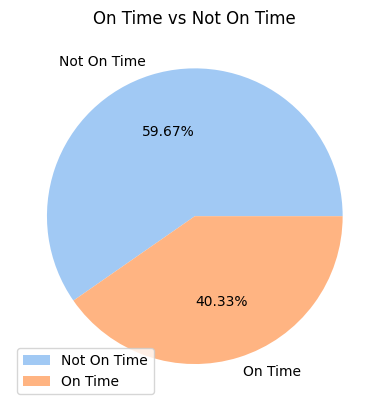

In [862]:
plt.pie(x = data_pie,
        labels = label_pie,
        colors = colors,
        autopct = '%.2f%%')
plt.title('On Time vs Not On Time')
plt.legend()
plt.show()

Terdapat lebih banyak Pengiriman sampai Tidak Tepat Waktu, dengan perbandingan : 
- Pengiriman Tidak Tepat Waktu = 59.67%
- Pengiriman Tepat Waktu = 40.33%

Pengiriman Barang yang dilakukan dengan tidak tepat waktu dapat menimbulkan pengalaman buruk pada customer.

Langkah yang dapat dilakukan adalah : 

- Persiapkan perencanaan yang baik.

Tentukan jadwal pengiriman yang realistis dan perencanaan yang matang. Pastikan perusahaan memberikan cukup waktu untuk memproses, mengemas, dan mempersiapkan barang dengan baik sebelum melakukan pengiriman.

- Pengemasan yang baik.

Pastikan barang dikemas dengan aman dan sesuai standar. Gunakan bahan kemasan yang kuat dan tahan terhadap guncangan atau benturan selama transportasi. Tandai dengan jelas informasi pengiriman seperti alamat pengirim dan penerima.

- Dokumen lengkap. 

Pastikan perusahaan memiliki semua dokumen yang diperlukan, seperti faktur, surat pengiriman, dan dokumen bea cukai jika diperlukan. Pastikan semua dokumen diisi dengan benar dan lengkap.

- Melacak pengiriman.

Gunakan perangkat dengan teknologi terkini yang dapat membantu melakukan pelacakan pergerakan barang oleh perusahaan ekspedisi. Dengan memantau pengiriman secara real-time, perusahaan dapat memastikan bahwa barang bergerak sesuai jadwal dan dapat mengatasi masalah jika terjadi keterlambatan.

- Komunikasi yang efektif. 

Tetap berkomunikasi dengan divisi pembawa dan penerima barang. Berikan informasi kontak yang valid agar dapat segera dihubungi jika diperlukan. Pastikan informasi tentang jadwal pengiriman dan instruksi pengiriman diteruskan kepada semua pihak terkait.

- Evaluasi kinerja. 

Setelah pengiriman selesai, lakukan evaluasi terhadap divisi ekspedisi. Kumpulkan *feedback* tentang pengalaman customer, termasuk kecepatan pengiriman, keandalan, dan kualitas layanan.

# Cek Warehouse Block

In [863]:
# Buat Bar Plot Perbandingan Warehouse_block
df_bar_warehouse_block = df['Warehouse_block'].value_counts().reset_index().rename(columns = {'index' : 'Warehouse_block', 'Warehouse_block' : 'Count'})

In [864]:
df_bar_warehouse_block

,Warehouse_block,Count
0,F,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


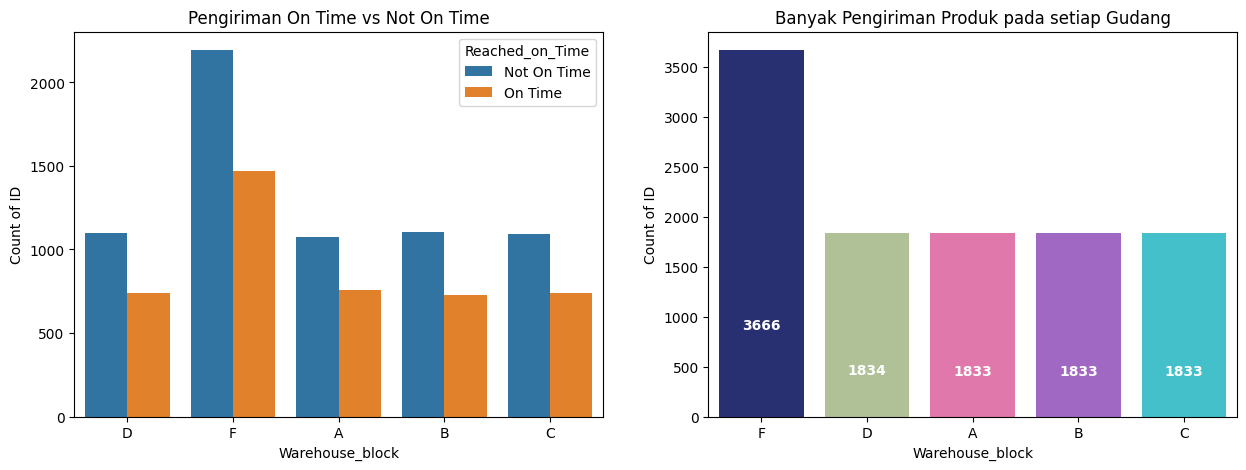

In [865]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pastel_palette = ["#1D267D", "#B3C890", "#F266AB", "#A459D1", "#2CD3E1"]


sns.barplot(
    data = df_bar_warehouse_block,
    x = 'Warehouse_block',
    y = 'Count',
    errorbar=None,
    ax=axes[1],
    palette = pastel_palette
)

plt.annotate(text=df_bar_warehouse_block['Count'][0], 
             xy=(0,df_bar_warehouse_block['Count'][0]/4),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_warehouse_block['Count'][1], 
             xy=(1,df_bar_warehouse_block['Count'][1]/4),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_warehouse_block['Count'][2], 
             xy=(2,df_bar_warehouse_block['Count'][2]/4),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_warehouse_block['Count'][3], 
             xy=(3,df_bar_warehouse_block['Count'][3]/4),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_warehouse_block['Count'][4], 
             xy=(4,df_bar_warehouse_block['Count'][4]/4),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

sns.barplot(
    data = df,
    x = 'Warehouse_block',
    y = 'ID',
    hue = 'Reached_on_Time',
    estimator = 'count',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title('Pengiriman On Time vs Not On Time')
axes[1].set_title('Banyak Pengiriman Produk pada setiap Gudang')

axes[0].set_ylabel('Count of ID')
axes[1].set_ylabel('Count of ID')

plt.show()

- Semua Warehouse Block memiliki tingkat Pengiriman tidak tepat waktu lebih tinggi dibandingkan dengan Pengiriman tepat waktu.

Pada Blok Gudang D, A, B, dan C memiliki tingkat perputaran dan distribusi barang yang cenderung merata, dan Gudang F memiliki tingkat perputaran dan distribusi barang yang lebih tinggi dibandingkan Gudang lainnya. Dapat dilakukan langkah untuk mendistribusikan barang barang dari Blok Gudang F ke gudang-gudang lainnya, dengan harapan kecepatan dan distribusi penyimpanan produk pada setiap gudang dapat lebih merata.

# Cek Mode of Shipment

In [866]:
# Buat Bar Plot Perbandingan Mode_of_Shipment
df_bar_shipment = df['Mode_of_Shipment'].value_counts().reset_index().rename(columns = {'index' : 'Mode_of_Shipment', 'Mode_of_Shipment' : 'Count'})

In [867]:
df_bar_shipment

,Mode_of_Shipment,Count
0,Ship,7462
1,Flight,1777
2,Road,1760


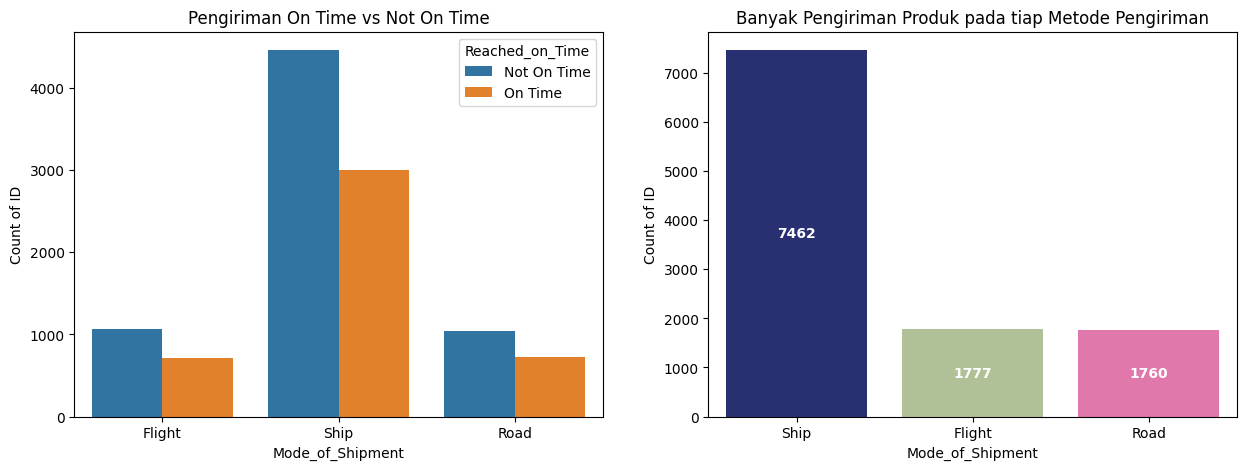

In [868]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pastel_palette = ["#1D267D", "#B3C890", "#F266AB", "#A459D1", "#2CD3E1"]

sns.barplot(
    data = df_bar_shipment,
    x = 'Mode_of_Shipment',
    y = 'Count',
    errorbar=None,
    ax=axes[1],
    palette = pastel_palette
)

plt.annotate(text=df_bar_shipment['Count'][0], 
             xy=(0,df_bar_shipment['Count'][0]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_shipment['Count'][1], 
             xy=(1,df_bar_shipment['Count'][1]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_shipment['Count'][2], 
             xy=(2,df_bar_shipment['Count'][2]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

sns.barplot(
    data = df,
    x = 'Mode_of_Shipment',
    y = 'ID',
    hue = 'Reached_on_Time',
    estimator = 'count',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title('Pengiriman On Time vs Not On Time')
axes[1].set_title('Banyak Pengiriman Produk pada tiap Metode Pengiriman')

axes[0].set_ylabel('Count of ID')
axes[1].set_ylabel('Count of ID')

plt.show()

- Semua Mode of Shipment memiliki tingkat Pengiriman tidak tepat waktu lebih tinggi dibandingkan dengan Pengiriman tepat waktu, terutama paling tinggi ada pada proses Shipping menggunakan Kapal.

Ada beberapa alasan mengapa pengiriman barang menggunakan kapal biasanya membutuhkan waktu lebih lama dibandingkan dengan transportasi darat atau udara. Berikut adalah beberapa faktor yang dapat mempengaruhi waktu pengiriman:

- Kecepatan kapal: Kapal umumnya memiliki kecepatan yang lebih lambat dibandingkan dengan kendaraan darat atau pesawat udara. Kapal terbatas oleh faktor seperti ukuran, bentuk kapal, dan kecepatan jelajah yang ditetapkan. Oleh karena itu, pengiriman menggunakan kapal membutuhkan waktu lebih lama untuk mencapai tujuan.

- Jarak dan rute: Kapal biasanya digunakan untuk mengirim barang melintasi perairan, seperti laut atau sungai. Jika jarak pengiriman melibatkan lautan yang luas atau perjalanan melalui jalur yang rumit, waktu pengiriman akan semakin lama. Selain itu, kapal juga mungkin perlu berhenti di beberapa pelabuhan untuk bongkar muat atau mengisi bahan bakar, yang memperpanjang waktu pengiriman.

- Pengurusan logistik: Pengiriman menggunakan kapal melibatkan proses pengurusan logistik yang kompleks. Barang harus dipindahkan dari darat ke pelabuhan, dimuat ke kapal, dan kemudian dibongkar di pelabuhan tujuan. Setiap tahap ini memerlukan waktu untuk pengorganisasian, koordinasi, dan proses administratif yang memadai.

- Ketergantungan pada cuaca: Kapal lebih rentan terhadap pengaruh cuaca buruk daripada kendaraan darat atau pesawat udara. Angin kencang, badai, atau kondisi cuaca buruk lainnya dapat mempengaruhi keberangkatan atau kedatangan kapal. Dalam kasus cuaca yang buruk, kapal mungkin harus menunda perjalanan atau mengambil rute yang lebih aman, yang memperpanjang waktu pengiriman.

- Proses bea cukai: Ketika melewati perbatasan internasional, pengiriman menggunakan kapal harus melewati proses bea cukai di pelabuhan-pelabuhan tujuan. Proses bea cukai ini dapat membutuhkan waktu tambahan untuk pemeriksaan, pemeriksaan dokumen, dan pemenuhan persyaratan impor dan ekspor yang berlaku.

- Meskipun pengiriman menggunakan kapal membutuhkan waktu lebih lama, ada juga keuntungan dalam hal biaya yang lebih rendah untuk pengiriman barang dalam jumlah besar dan kemampuan kapal untuk mengangkut muatan yang lebih berat atau berukuran besar. Oleh karena itu, pilihan transportasi tergantung pada sifat barang yang dikirim, kecepatan yang diinginkan, dan pertimbangan biaya yang relevan.

Langkah yang dapat dilakukan adalah : 

- Perencanaan yang baik: Lakukan perencanaan yang matang untuk pengiriman barang menggunakan kapal. Tentukan jadwal pengiriman yang realistis dengan mempertimbangkan jarak, rute, dan waktu yang diperlukan untuk proses bea cukai. Dengan melakukan perencanaan yang baik, perusahaan dapat mengurangi risiko keterlambatan pengiriman.

- Pemilihan rute yang efisien: Pilih rute yang paling efisien untuk pengiriman menggunakan kapal. Cari jalur pelayaran yang meminimalkan waktu perjalanan dan menghindari rute yang rumit atau berbahaya. Memilih jalur pengiriman yang tepat dapat membantu mengurangi waktu yang diperlukan untuk pengiriman.

- Alternatif transportasi: Pertimbangkan alternatif transportasi seperti menggunakan transportasi darat atau udara jika waktu pengiriman yang cepat menjadi prioritas. Meskipun biayanya mungkin lebih tinggi, tetapi pengiriman menggunakan transportasi darat atau udara bisa menjadi pilihan yang lebih cepat dan efisien terutama untuk barang dengan waktu pengiriman yang sangat kritis.


# Product Importance

In [869]:
# Buat Bar Plot Perbandingan Product_importance
df_bar_product_importance = df['Product_importance'].value_counts().reset_index().rename(columns = {'index' : 'Product_importance', 'Product_importance' : 'Count'})

In [870]:
df_bar_product_importance

,Product_importance,Count
0,low,5297
1,medium,4754
2,high,948


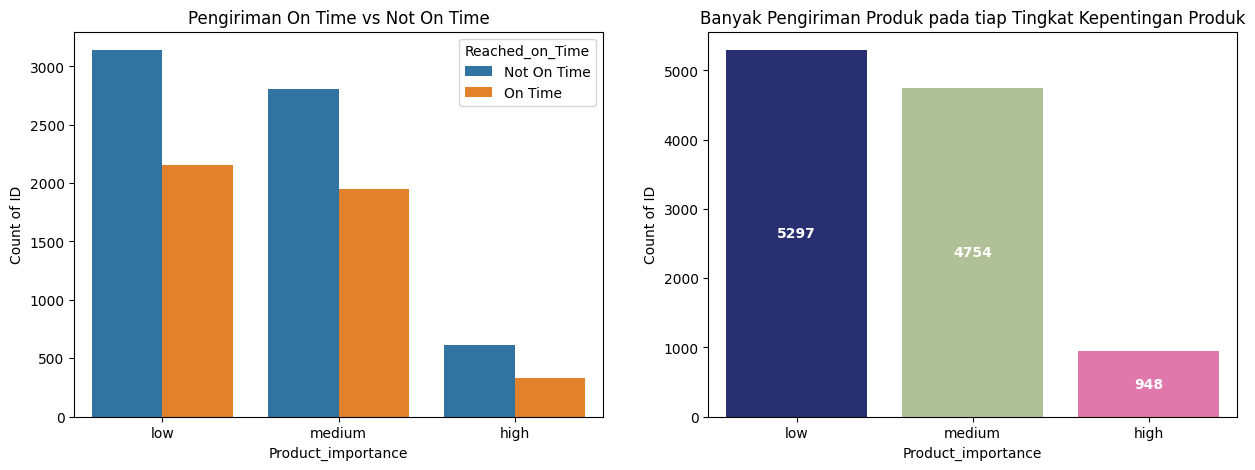

In [871]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pastel_palette = ["#1D267D", "#B3C890", "#F266AB", "#A459D1", "#2CD3E1"]

sns.barplot(
    data = df_bar_product_importance,
    x = 'Product_importance',
    y = 'Count',
    errorbar=None,
    ax=axes[1],
    palette = pastel_palette
)

plt.annotate(text=df_bar_product_importance['Count'][0], 
             xy=(0,df_bar_product_importance['Count'][0]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_product_importance['Count'][1], 
             xy=(1,df_bar_product_importance['Count'][1]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_product_importance['Count'][2], 
             xy=(2,df_bar_product_importance['Count'][2]/2),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

sns.barplot(
    data = df,
    x = 'Product_importance',
    y = 'ID',
    hue = 'Reached_on_Time',
    estimator = 'count',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title('Pengiriman On Time vs Not On Time')
axes[1].set_title('Banyak Pengiriman Produk pada tiap Tingkat Kepentingan Produk')

axes[0].set_ylabel('Count of ID')
axes[1].set_ylabel('Count of ID')

plt.show()

- Semua kategori dalam Product_importance mengalami tingkat keterlambatan dalam pengiriman lebih tinggi dibandingkan pengiriman yang tepat waktu.

Langkah yang dapat dilakukan adalah : 
- Lakukan Pemerataan Pengelolaan -> Dalam konteks pengelolaan produk dan rantai pasok, analisis ini dapat membantu dalam menentukan pengelolaan dan alokasi sumber daya. Produk dengan tingkatan kepentingan tinggi mungkin membutuhkan perhatian dan penanganan yang lebih intensif dalam hal pemenuhan permintaan, manajemen persediaan, pengiriman yang tepat waktu, dan penanganan khusus lainnya. Di sisi lain, produk dengan tingkatan kepentingan rendah mungkin memerlukan strategi yang berbeda dalam pengelolaan dan pengalokasian sumber daya. Usahakan agar dari berbagai macam tingkat kepentingan produk dapat ditangani dengan baik.

# Prior Purchase

In [872]:
# Buat Bar Plot Prior Purchase
df_bar_prior_purchases = df['Prior_purchases'].value_counts().reset_index().rename(columns = {'index' : 'Prior_purchases', 'Prior_purchases' : 'Count'})

In [873]:
df_bar_prior_purchases

,Prior_purchases,Count
0,3,3955
1,2,2599
2,4,2155
3,5,1287
4,6,561
5,10,178
6,7,136
7,8,128


In [874]:
df_bar_prior_purchases_sorted = df_bar_prior_purchases.sort_values('Prior_purchases')

In [875]:
df_bar_prior_purchases_sorted

,Prior_purchases,Count
1,2,2599
0,3,3955
2,4,2155
3,5,1287
4,6,561
6,7,136
7,8,128
5,10,178


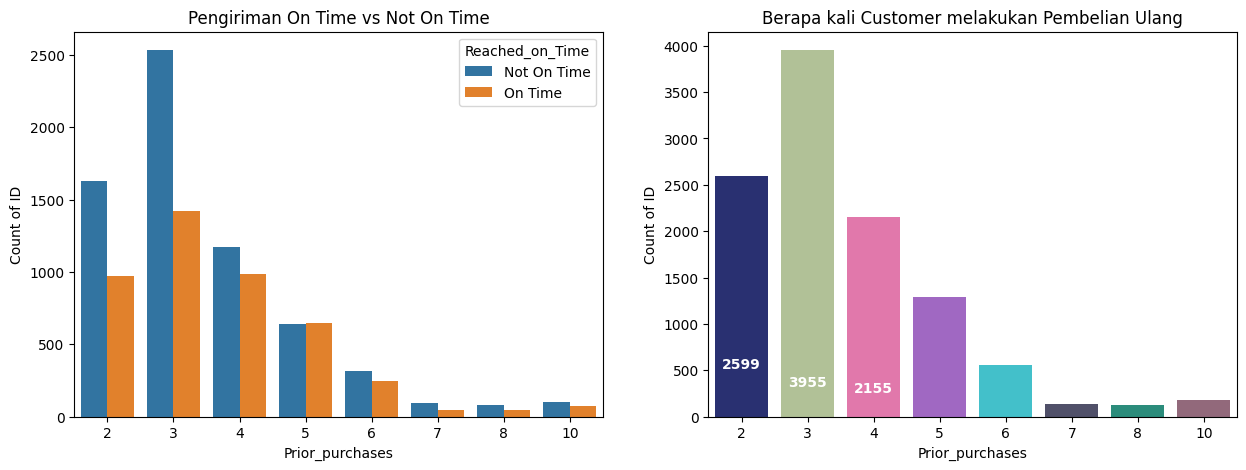

In [876]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pastel_palette = ["#1D267D", "#B3C890", "#F266AB", "#A459D1", "#2CD3E1", 
                  '#4C4C6D', '#1B9C85', '#99627A']

sns.barplot(
    data=df,
    x='Prior_purchases',
    y='ID',
    estimator='count',
    errorbar=None,
    ax=axes[1],
    palette = pastel_palette
)

plt.annotate(text=df_bar_prior_purchases['Count'][0], 
             xy=(1,df_bar_prior_purchases['Count'][1]/7),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_prior_purchases['Count'][1], 
             xy=(0,df_bar_prior_purchases['Count'][0]/7),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

plt.annotate(text=df_bar_prior_purchases['Count'][2], 
             xy=(2,df_bar_prior_purchases['Count'][2]/7),
             va='center',
             ha='center',
             color='white',
             fontweight='bold')

sns.barplot(
    data = df,
    x = 'Prior_purchases',
    y = 'ID',
    hue = 'Reached_on_Time',
    estimator = 'count',
    errorbar=None,
    ax=axes[0]
    
)

axes[0].set_title('Pengiriman On Time vs Not On Time')
axes[1].set_title('Berapa kali Customer melakukan Pembelian Ulang')

axes[0].set_ylabel('Count of ID')
axes[1].set_ylabel('Count of ID')

plt.show()

Pada customer yang sebelumnya sudah melakukan pembelian sebanyak 3x mengalami tingkat keterlambatan yang paling tinggi.
<br><br>
- Tingkat retensi customer semakin turun. Besar kemungkinan disebabkan oleh tingginya tingkat keterlambatan pada pengiriman seiring berjalannya waktu yang berdampak pada menurunnya tingkat customer yang loyal melakukan transaksi pada perusahaan.

In [877]:
df['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6     561 
10    178 
7     136 
8     128 
Name: Prior_purchases, dtype: int64

# Discount_offered

In [878]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,Not On Time
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,On Time
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,On Time
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,On Time


In [879]:
df_discount = df.copy()
df_discount['discount binning'] = pd.cut(df_discount['Discount_offered'], bins=5, labels=['<14%', '14-27', '27-40', '40-53', '>53'])
df_discount['discount binning'].value_counts()

<14%     8514
40-53    654 
>53      626 
27-40    605 
14-27    600 
Name: discount binning, dtype: int64

In [880]:
df_discount.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,discount binning
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time,40-53
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time,>53
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time,40-53
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time,<14%
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time,40-53


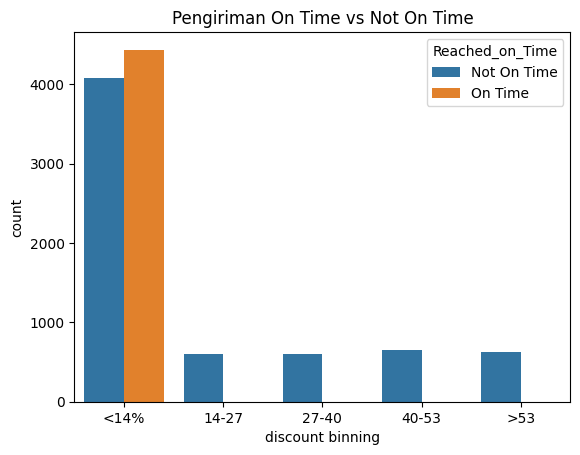

In [881]:
sns.countplot(data=df_discount, 
              x='discount binning', 
              hue='Reached_on_Time')

plt.title('Pengiriman On Time vs Not On Time')

plt.show()

Semua barang dengan Discount diatas sekitar 14% mengalami keterlambatan dalam pengiriman.

Langkah yang dapat dilakukan : 

- Perlu dikaji ulang kembali untuk penerapan discount diatas 14% mengapa semua pengiriman mengalami keterlambatan, komunikasikan ulang dengan divisi marketing, finance, logistik & supply chain, apakah untuk produk dengan discount diatas 14% diberikan jenis ekspedisi / waktu pemrosesan layanan berbeda yang berdampak pada keterlambatan pengiriman produk. Usahakan agar campaign yang dilakukan tidak merugikan berbagai belah pihak. Sesuaikan dengan tingkat kepuasan konsumen, kemampuan alur distribusi produk dari hulu ke hilir dari divisi logistik dan supply chain, dan kondisi finansial perusahaan.

# Cek Weight_in_gms	

In [882]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,Not On Time
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,On Time
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,On Time
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,On Time


In [883]:
df_weight = df.copy()
df_weight['weight binning'] = pd.cut(df_weight['Weight_in_gms'], bins=3, labels=['Ringan', 'Sedang', 'Berat'])
df_weight['weight binning'].value_counts()

Sedang    5339
Ringan    4377
Berat     1283
Name: weight binning, dtype: int64

In [884]:
df_weight

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,weight binning
0,1,D,Flight,4,2,177,3,low,F,44,1233,Not On Time,Ringan
1,2,F,Flight,4,5,216,2,low,M,59,3088,Not On Time,Ringan
2,3,A,Flight,2,2,183,4,low,M,48,3374,Not On Time,Sedang
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Not On Time,Ringan
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Not On Time,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,Not On Time,Ringan
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,On Time,Ringan
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,On Time,Ringan
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,On Time,Ringan


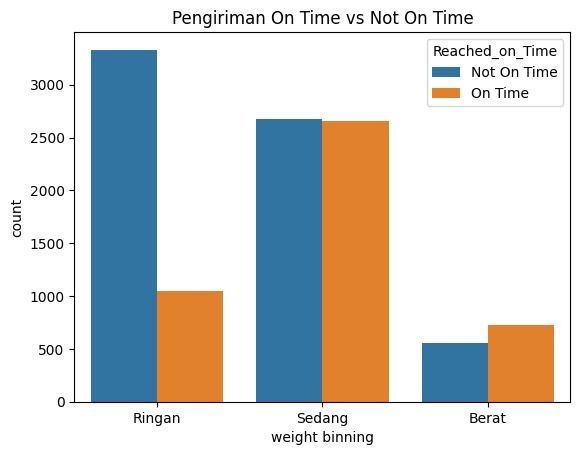

In [885]:
sns.countplot(data=df_weight, 
              x='weight binning', 
              hue='Reached_on_Time')

plt.title('Pengiriman On Time vs Not On Time')

plt.show()

Barang dengan kategori berat cenderung sampai lebih tepat waktu karena beberapa alasan berikut:

- Prioritas Pengiriman: Barang dengan kategori berat seringkali dianggap sebagai prioritas pengiriman. Ini terutama terjadi ketika ada keterbatasan kapasitas pengangkutan untuk barang berat. Divisi logistik cenderung memberikan prioritas kepada barang berat karena nilai dan urgensi pengiriman yang lebih tinggi. Dalam kasus ini, Divisi logistik akan berusaha untuk memastikan pengiriman barang berat tepat waktu agar memenuhi kebutuhan dan harapan pelanggan.

- Kapasitas Pengangkutan yang Terbatas: Transportasi untuk barang berat biasanya terbatas, terutama jika menggunakan transportasi darat atau udara. Jumlah kendaraan atau pesawat yang dapat mengangkut barang berat mungkin lebih sedikit dibandingkan dengan barang yang lebih ringan. Karena keterbatasan kapasitas tersebut, divisi logistik akan lebih berfokus pada pengiriman barang berat untuk memastikan bahwa kapasitas pengangkutan optimal digunakan dan pengiriman dilakukan dengan tepat waktu.

- Rencana Pengiriman yang Lebih Ketat: Pengiriman barang berat sering kali memerlukan perencanaan yang lebih matang dan waktu persiapan yang lebih lama. Hal ini biasanya dilakukan untuk memastikan pengiriman tepat waktu dan keamanan pengangkutan barang berat. Rencana pengiriman yang lebih ketat dan persiapan yang lebih awal membantu mengurangi risiko keterlambatan dan memastikan barang sampai tujuan sesuai dengan jadwal yang telah ditentukan.

- Layanan Khusus: Pengiriman barang berat seringkali memerlukan layanan khusus seperti penggunaan peralatan pengangkut khusus, pengamanan ekstra, atau tim logistik yang terlatih secara khusus. Karena karakteristik ini, divisi logistik akan berusaha keras untuk memberikan layanan yang tepat waktu dan berkualitas bagi barang berat. Upaya yang lebih besar dalam mempersiapkan dan melaksanakan pengiriman barang berat membantu dalam meminimalkan keterlambatan dan memastikan pengiriman tepat waktu.

Meskipun barang dengan kategori berat cenderung sampai lebih tepat waktu, perlu diingat bahwa ada banyak faktor lain yang dapat mempengaruhi keterlambatan pengiriman, termasuk kendala lalu lintas, cuaca buruk, masalah administratif, atau situasi tak terduga lainnya. Oleh karena itu, tetap penting untuk melakukan perencanaan yang matang, berkomunikasi dengan penyedia logistik, dan memantau pengiriman barang secara terus-menerus untuk memastikan pengiriman yang tepat waktu.

Untuk mengatasi keterlambatan pengiriman barang dengan kategori ringan dan sedang, berikut adalah beberapa solusi yang dapat dipertimbangkan:

- Pemilihan Layanan Pengiriman yang Tepat: Evaluasi jenis layanan pengiriman yang digunakan untuk barang dengan kategori ringan dan sedang. Mungkin ada pilihan layanan yang lebih cepat atau dengan waktu transit yang lebih pendek yang dapat digunakan untuk memastikan pengiriman tepat waktu. Divisi logistik harus dapat memberikan opsi yang lebih sesuai dengan kebutuhan pengiriman sesuai dengan kategori barang.

- Perencanaan Pengiriman yang Efisien: Lakukan perencanaan yang matang untuk pengiriman barang ringan dan sedang. Tentukan jadwal pengiriman yang realistis dengan mempertimbangkan waktu pemrosesan, waktu yang diperlukan untuk pengambilan dan pengemasan, serta waktu transit. Pastikan untuk memberikan waktu yang cukup untuk setiap tahap proses pengiriman agar pengiriman dapat dilakukan tepat waktu.

- Koordinasi yang Baik dengan Pihak Terkait: Jalin komunikasi yang efektif dengan pemasok, mitra logistik, dan pihak terkait lainnya. Pastikan agar semua pihak memiliki pemahaman yang jelas tentang waktu pengiriman yang diharapkan dan kebutuhan khusus terkait dengan barang ringan dan sedang. Koordinasi yang baik akan membantu menghindari kesalahan dan memastikan bahwa semua langkah pengiriman berjalan lancar.

- Evaluasi Rute Pengiriman: Tinjau rute pengiriman yang digunakan untuk barang ringan dan sedang. Mungkin ada opsi rute yang lebih efisien atau penggunaan moda transportasi yang lebih cepat yang dapat mengurangi waktu pengiriman. Pertimbangkan untuk memanfaatkan transportasi udara atau kereta api jika memungkinkan, terutama untuk pengiriman jarak jauh.

- Manajemen Persediaan yang Efektif: Pastikan bahwa persediaan barang ringan dan sedang selalu terpenuhi dan tersedia dalam jumlah yang memadai. Dengan mengelola persediaan dengan baik, perusahaan dapat menghindari kekurangan stok yang dapat menyebabkan penundaan pengiriman. Gunakan metode manajemen persediaan yang efektif untuk memastikan stok yang tepat saat diperlukan.

- Identifikasi Proses dan Perbaikan Continous Improvement: Identifikasi area yang dapat ditingkatkan untuk meningkatkan efisiensi dan kecepatan pengiriman. Lakukan perbaikan kontinu dengan menerapkan solusi yang ditemukan untuk mengurangi keterlambatan dan meningkatkan kinerja pengiriman.

- Penggunaan Teknologi dan Automasi: Pertimbangkan penggunaan teknologi dan otomasi untuk meningkatkan efisiensi dan akurasi dalam pengelolaan pengiriman barang. Penggunaan sistem manajemen pergudangan (warehouse management system) dan sistem pelacakan pengiriman yang terintegrasi dapat membantu memantau dan mengelola pengiriman dengan lebih efisien.

Untuk upaya meningkatkan kualitas pengiriman tepat waktu pada semua kategori barang dapat dilakukan langkah sebagai berikut : 

- Evaluasi dan Peningkatan: Lakukan evaluasi secara berkala terhadap performa pengiriman pada semua kategori barang. Tinjau proses yang ada, identifikasi penyebab keterlambatan atau masalah yang sering muncul, dan cari solusi untuk meningkatkan efisiensi dan keandalan pengiriman. Terus berupaya untuk melakukan peningkatan dengan menerapkan perbaikan yang diperlukan untuk mengatasi masalah yang muncul.

# Kesimpulan

Berdasarkan dari hasil analisis data Online Retail Shipping maka dapat menjawab pertanyaan *stakeholder* perusahaan yakni **apa saja yang dapat mengakibatkan keterlambatan pada pengiriman produk**, adalah sebagai berikut :

1. Semua Warehouse Block memiliki tingkat Pengiriman tidak tepat waktu lebih tinggi dibandingkan dengan Pengiriman tepat waktu.

Pada Blok Gudang D, A, B, dan C memiliki tingkat perputaran dan distribusi barang yang cenderung merata, dan Gudang F memiliki tingkat perputaran dan distribusi barang yang lebih tinggi dibandingkan Gudang lainnya. Dapat dilakukan langkah untuk mendistribusikan barang barang dari Blok Gudang F ke gudang-gudang lainnya, dengan harapan kecepatan dan distribusi penyimpanan produk pada setiap gudang dapat lebih merata.

2. Semua Mode of Shipment memiliki Pengiriman tidak tepat waktu lebih tinggi dibandingkan dengan Pengiriman tepat waktu, terutama paling tinggi ada pada proses Shipping menggunakan Kapal.

Ada beberapa alasan mengapa pengiriman barang menggunakan kapal biasanya membutuhkan waktu lebih lama dibandingkan dengan transportasi darat atau udara. Berikut adalah beberapa faktor yang dapat mempengaruhi waktu pengiriman:

- Kecepatan kapal: Kapal umumnya memiliki kecepatan yang lebih lambat dibandingkan dengan kendaraan darat atau pesawat udara. Kapal terbatas oleh faktor seperti ukuran, bentuk kapal, dan kecepatan jelajah yang ditetapkan. Oleh karena itu, pengiriman menggunakan kapal membutuhkan waktu lebih lama untuk mencapai tujuan.

- Jarak dan rute: Kapal biasanya digunakan untuk mengirim barang melintasi perairan, seperti laut atau sungai. Jika jarak pengiriman melibatkan lautan yang luas atau perjalanan melalui jalur yang rumit, waktu pengiriman akan semakin lama. Selain itu, kapal juga mungkin perlu berhenti di beberapa pelabuhan untuk bongkar muat atau mengisi bahan bakar, yang memperpanjang waktu pengiriman.

- Pengurusan logistik: Pengiriman menggunakan kapal melibatkan proses pengurusan logistik yang kompleks. Barang harus dipindahkan dari darat ke pelabuhan, dimuat ke kapal, dan kemudian dibongkar di pelabuhan tujuan. Setiap tahap ini memerlukan waktu untuk pengorganisasian, koordinasi, dan proses administratif yang memadai.

- Ketergantungan pada cuaca: Kapal lebih rentan terhadap pengaruh cuaca buruk daripada kendaraan darat atau pesawat udara. Angin kencang, badai, atau kondisi cuaca buruk lainnya dapat mempengaruhi keberangkatan atau kedatangan kapal. Dalam kasus cuaca yang buruk, kapal mungkin harus menunda perjalanan atau mengambil rute yang lebih aman, yang memperpanjang waktu pengiriman.

- Proses bea cukai: Ketika melewati perbatasan internasional, pengiriman menggunakan kapal harus melewati proses bea cukai di pelabuhan-pelabuhan tujuan. Proses bea cukai ini dapat membutuhkan waktu tambahan untuk pemeriksaan, pemeriksaan dokumen, dan pemenuhan persyaratan impor dan ekspor yang berlaku.

- Meskipun pengiriman menggunakan kapal membutuhkan waktu lebih lama, ada juga keuntungan dalam hal biaya yang lebih rendah untuk pengiriman barang dalam jumlah besar dan kemampuan kapal untuk mengangkut muatan yang lebih berat atau berukuran besar. Oleh karena itu, pilihan transportasi tergantung pada sifat barang yang dikirim, kecepatan yang diinginkan, dan pertimbangan biaya yang relevan.

3. Semua kategori dalam Product_importance mengalami tingkat keterlambatan dalam pengiriman lebih tinggi dibandingkan pengiriman yang tepat waktu.

4. Pada customer yang sebelumnya sudah melakukan pembelian sebanyak 3x mengalami tingkat keterlambatan yang paling tinggi.

- Tingkat retensi customer dari customer yang sudah melakukan transaksi sejak lama semakin menurun. Besar kemungkinan disebabkan oleh tingginya tingkat keterlambatan pada pengiriman seiring berjalannya waktu yang berdampak pada menurunnya tingkat customer yang loyal melakukan transaksi pada perusahaan.

5. Semua barang dengan Discount diatas sekitar 14% mengalami keterlambatan dalam pengiriman.

6. Barang dengan kategori berat cenderung sampai lebih tepat waktu karena beberapa alasan berikut:

- Prioritas Pengiriman: Barang dengan kategori berat seringkali dianggap sebagai prioritas pengiriman. Ini terutama terjadi ketika ada keterbatasan kapasitas pengangkutan untuk barang berat. Divisi logistik cenderung memberikan prioritas kepada barang berat karena nilai dan urgensi pengiriman yang lebih tinggi. Dalam kasus ini, Divisi logistik akan berusaha untuk memastikan pengiriman barang berat tepat waktu agar memenuhi kebutuhan dan harapan pelanggan.

- Kapasitas Pengangkutan yang Terbatas: Transportasi untuk barang berat biasanya terbatas, terutama jika menggunakan transportasi darat atau udara. Jumlah kendaraan atau pesawat yang dapat mengangkut barang berat mungkin lebih sedikit dibandingkan dengan barang yang lebih ringan. Karena keterbatasan kapasitas tersebut, divisi logistik akan lebih berfokus pada pengiriman barang berat untuk memastikan bahwa kapasitas pengangkutan optimal digunakan dan pengiriman dilakukan dengan tepat waktu.

- Rencana Pengiriman yang Lebih Ketat: Pengiriman barang berat sering kali memerlukan perencanaan yang lebih matang dan waktu persiapan yang lebih lama. Hal ini biasanya dilakukan untuk memastikan pengiriman tepat waktu dan keamanan pengangkutan barang berat. Rencana pengiriman yang lebih ketat dan persiapan yang lebih awal membantu mengurangi risiko keterlambatan dan memastikan barang sampai tujuan sesuai dengan jadwal yang telah ditentukan.

- Layanan Khusus: Pengiriman barang berat seringkali memerlukan layanan khusus seperti penggunaan peralatan pengangkut khusus, pengamanan ekstra, atau tim logistik yang terlatih secara khusus. Karena karakteristik ini, divisi logistik akan berusaha keras untuk memberikan layanan yang tepat waktu dan berkualitas bagi barang berat. Upaya yang lebih besar dalam mempersiapkan dan melaksanakan pengiriman barang berat membantu dalam meminimalkan keterlambatan dan memastikan pengiriman tepat waktu.

Meskipun barang dengan kategori berat cenderung sampai lebih tepat waktu, perlu diingat bahwa ada banyak faktor lain yang dapat mempengaruhi keterlambatan pengiriman, termasuk kendala lalu lintas, cuaca buruk, masalah administratif, atau situasi tak terduga lainnya. Oleh karena itu, tetap penting untuk melakukan perencanaan yang matang, berkomunikasi dengan penyedia logistik, dan memantau pengiriman barang secara terus-menerus untuk memastikan pengiriman yang tepat waktu.

# Rekomendasi

Langkah yang dapat dipertimbangkan untuk **meningkatkan ketepatan waktu pengiriman barang** adalah sebagai berikut : 

- Lakukan langkah untuk mendistribusikan barang barang dari Blok Gudang yang lebih menumpuk ke gudang-gudang lainnya, dengan harapan kecepatan dan distribusi penyimpanan produk pada setiap gudang dapat lebih merata.

- Lakukan perencanaan yang matang untuk pengiriman barang dalam menggunakan mode transportasi pengiriman apapun. Tentukan jadwal pengiriman yang realistis dengan mempertimbangkan jarak, rute, dan waktu yang diperlukan untuk proses bea cukai. Dengan melakukan perencanaan yang baik, perusahaan dapat mengurangi risiko keterlambatan pengiriman.

- Pilih rute yang paling efisien untuk pengiriman menggunakan mode transportasi pengiriman apapun. Cari jalur yang meminimalkan waktu perjalanan dan menghindari rute yang rumit atau berbahaya. Memilih jalur pengiriman yang tepat dapat membantu mengurangi waktu yang diperlukan untuk pengiriman.

- Pertimbangkan alternatif metode transportasi jika waktu pengiriman yang lebih cepat menjadi prioritas. Meskipun biayanya mungkin lebih tinggi, tetapi dapat menjadi pilihan yang lebih cepat dan efisien terutama untuk barang dengan waktu pengiriman yang sangat kritis.

- Lakukan Pemerataan Pengelolaan : Dalam konteks pengelolaan produk dan rantai pasok, hal ini dapat membantu dalam menentukan pengelolaan dan alokasi sumber daya. Produk dengan tingkatan kepentingan tinggi mungkin membutuhkan perhatian dan penanganan yang lebih intensif dalam hal pemenuhan permintaan, manajemen persediaan, pengiriman yang tepat waktu, dan penanganan khusus lainnya. Di sisi lain, produk dengan tingkatan kepentingan rendah mungkin memerlukan strategi yang berbeda dalam pengelolaan dan pengalokasian sumber daya. Usahakan agar dari berbagai macam tingkat kepentingan produk dapat ditangani dengan baik.

- Berikan perlakuan yang baik terhadap customer loyal, kirim barang pesanan dengan baik dan pastikan tepat waktu.
Lebih susah menjaring customer baru dibandingkan memaintain customer loyal yang sudah bertransaksi dengan perusahaan kita sejak lama.

- Kaji ulang kembali penerapan discount diatas 14% mengapa semua pengiriman mengalami keterlambatan, komunikasikan ulang dengan divisi marketing, finance, logistik & supply chain, apakah untuk produk dengan discount diatas 14% diberikan jenis ekspedisi / waktu pemrosesan layanan berbeda yang berdampak pada keterlambatan pengiriman produk. Usahakan agar campaign yang dilakukan tidak merugikan berbagai belah pihak. Sesuaikan dengan tingkat kepuasan konsumen, kemampuan alur distribusi produk dari hulu ke hilir dari divisi logistik dan supply chain, dan kondisi finansial perusahaan. Berikan diskon yang sesuai dengan kondisi dan kemampuan perusahaan agar dapat memberikan dampak yang positif baik untuk perusahaan dan customer.

- Evaluasi dan Peningkatan: Lakukan evaluasi secara berkala terhadap performa pengiriman pada semua kategori barang. Tinjau proses yang ada, identifikasi penyebab keterlambatan atau masalah yang sering muncul, dan cari solusi untuk meningkatkan efisiensi dan keandalan pengiriman. Terus berupaya untuk melakukan peningkatan dengan menerapkan perbaikan yang diperlukan untuk mengatasi masalah yang muncul.

# Export Data

In [886]:
df.to_excel('Capstone2-BryanLutfiPradhana.xlsx', index=False)